In [11]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [29]:
img_path="DATA_SPLIT/val/photos/tuberculosis-phone-0032.jpg"
annot_path="DATA_SPLIT/val/anotations/tuberculosis-phone-0032.csv"

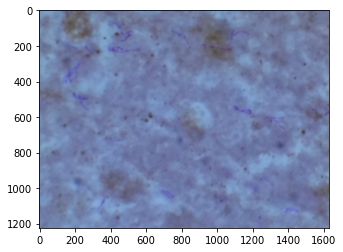

In [124]:
img=cv2.imread(img_path)
plt.imshow(img)
plt.show()

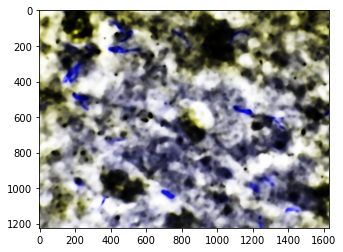

In [141]:
#img[:,:,1] = cv2.equalizeHist(img[:,:,2])
#img[:,:,0] = cv2.equalizeHist(img[:,:,0])
#img[:,:,2] = cv2.equalizeHist(img[:,:,1])
img=cv2.imread(img_path)
img=cv2.medianBlur(img,15)

img[:,:,1] = cv2.equalizeHist(img[:,:,1])
img[:,:,0] = cv2.equalizeHist(img[:,:,1])
img[:,:,2] = cv2.equalizeHist(img[:,:,2])

plt.imshow(img)
plt.show()

In [257]:
train_images=[]
train_labels=[]


ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()


image=img
df=pd.read_csv(annot_path)
gtvalues=[]
for row in df.iterrows():
    x1 = int(row[1][0].split(" ")[0])
    y1 = int(row[1][0].split(" ")[1])
    x2 = int(row[1][0].split(" ")[2])
    y2 = int(row[1][0].split(" ")[3])
    gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
ss.setBaseImage(image)
ss.switchToSelectiveSearchFast()
ssresults = ss.process()
imout = image.copy()
counter = 0
falsecounter = 0
flag = 0
fflag = 0
bflag = 0


count_true=0
count_false=0
count=0
it=0

for e,result in enumerate(ssresults):
    it+=1
    if count_true<10:
        for gtval in gtvalues:
            x,y,w,h = result
            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
            if count<30:
                if iou>0.7:
                    timage = imout[y:y+h,x:x+w]
                    resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                    train_images.append(resized)
                    train_labels.append(1)
                    count_true+=1
                    count+=1
                else:
                    if (count_false<20):
                        timage = imout[y:y+h,x:x+w]
                        resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                        train_images.append(resized)
                        train_labels.append(0)
                        count_false += 1
                        count+=1





In [258]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

print(X_new.shape,y_new.shape)

(22, 224, 224, 3) (22,)


In [259]:
ssresults.shape

(7167, 4)

In [260]:
y_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [261]:
it

7167

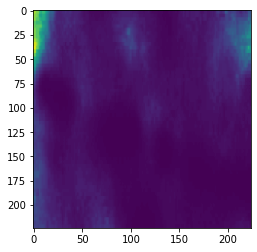

In [93]:
plt.imshow(X_new[28,:,:,2])
plt.show()

#Normalize image

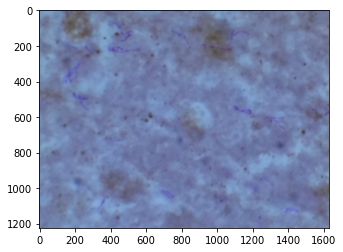

In [184]:
img=cv2.imread(img_path)
plt.imshow(img)
plt.show()

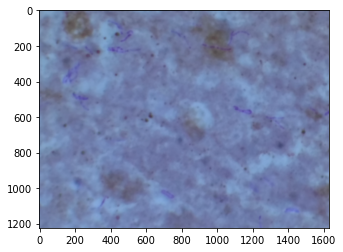

In [226]:
imge=cv2.imread(img_path)
imge=cv2.medianBlur(imge,5)
plt.imshow(imge)
plt.show()

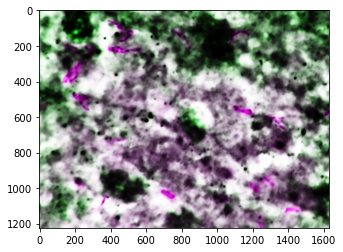

In [256]:
img=cv2.imread(img_path)
img=cv2.medianBlur(imge,5)
img[:,:,0] = cv2.equalizeHist(img[:,:,2])
img[:,:,2] = cv2.equalizeHist(img[:,:,0])
img[:,:,1] = cv2.equalizeHist(img[:,:,1])
#img=img/255
plt.imshow(img)
plt.show()

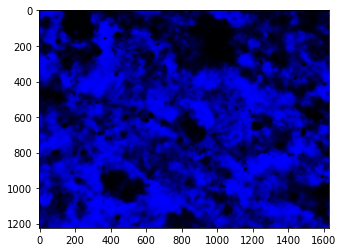

In [271]:
img=cv2.imread(img_path)
img=cv2.medianBlur(imge,5)
#img[:,:,0] = cv2.equalizeHist(img[:,:,2])
img[:,:,2] = cv2.equalizeHist(img[:,:,2])
img[:,:,0] = 0

img[:,:,1] = 0
img=img/255
plt.imshow(img)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

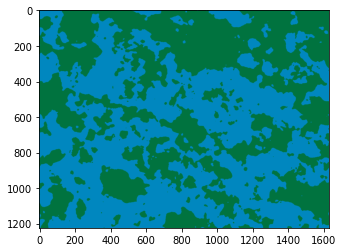

In [270]:
img_n= img.reshape(img.shape[0]*img.shape[1], img.shape[2])
kmeans = KMeans(n_clusters=2, random_state=0).fit(img_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(cluster_pic)

# grey Scale

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

In [142]:
gray = rgb2gray(img)
plt.imshow(gray, cmap='gray')



NameError: name 'rgb2gray' is not defined

ValueError: cannot reshape array of size 5992704 into shape (1997568,)